### Classes and Object Oriented Programming (OOP)

Imagine that you want to store some *fundamental constant* in a program, that can be accessed at the global level, without the risk to shadow or destroy them, by redefinition, in some other part of the program.

You can do that by build a specific *class* that stores those numbers: 

In [1]:
class constant_class():
    def __init__(self):
       self.h=6.62607e-34      # Planck
       self.k=1.38065e-23      # Boltzmann
       self.avo=6.02214e23     # Avogadro
       self.R=self.avo*self.k  # Gas constant

We defined the *class* *constant_class*. The *class* definition, at this level, is very much like a *function definition* (with an empty list of arguments, for now). 

Inside the class, we defined an ``` __init__ ``` function, with a strange argument *self* (*self* is a label that refers to the definition of the class, and that will be substituted by the label specifying each single *instance* of the class itself. 

The body of *init* consists of the assignment of our fundamental constants (in the standard SI units), each one preceded by the label *self*. Our constants will be the *attributes* of the class.

To use the class, we first have to create an *instance* of it. We call *fc* such instance:

In [2]:
fc=constant_class()

Now, the retrieve the Avogadro number, you just have to write:

In [3]:
fc.avo

6.02214e+23

It works fine in functions, too:

In [4]:
def func():
    print("The avogadro number is ", fc.avo)
    
func()

The avogadro number is  6.02214e+23


To get the value of some attribute of the class, it is a ***very good practice*** to define a function within the class that returns the value of the wanted attribute. A function within a class is called *method*:

In [5]:
class constant_class():
    def __init__(self):
       self.h=6.62607e-34      # Planck
       self.k=1.38065e-23      # Boltzmann
       self.avo=6.02214e23     # Avogadro
       self.R=self.avo*self.k  # Gas constant
        
    def get_avogadro(self):
        return self.avo
    
    def get_boltzmann(self):
        return self.k
    
    def get_planck(self):
        return self.h
    
    def get_gas(self):
        return self.R
    
fc=constant_class()

Now, wanting for instance the value of the gas constant, you can use the method *get_gas*:

In [6]:
fc.get_gas()

8.314467591

You could also define a method *get_constant* that requires the name of the constant to be retrieved:

In [7]:
class constant_class():
    def __init__(self):
       self.h=6.62607e-34      # Planck
       self.k=1.38065e-23      # Boltzmann
       self.avo=6.02214e23     # Avogadro
       self.R=self.avo*self.k  # Gas constant
        
    def get_avogadro(self):
        return self.avo
    
    def get_boltzmann(self):
        return self.k
    
    def get_planck(self):
        return self.h
    
    def get_gas(self):
        return self.R
    
    def get_constant(self, const):      
        if const=='avogadro':
            return self.avo
        elif const=='boltzmann':
            return self.k
        elif const=='planck':
            return self.h
        elif const=='gas':
            return self.R
        else:
            print("Unknown constant ", const)
              
    
fc=constant_class()

For instance:

In [8]:
fc.get_constant('gas')

8.314467591

Now, those constant are stored in SI units... but you might want them in some different units! For instance, the gas constant is stored in $m^3 Pa\ /\ mol K$, and you may want it in $\ell atm\ / mole K$. 

You need a conversion factor.

So: 

- start by defining, in *init*, the variable *self.R_unit = 1.* This is the factor used to convert the value of your constant;
- modify each function returning the value of *R* (*R* multiplied by such conversion factor);
- define the function *set_unit* that *asks* for the constant and the type of units wanted.

In [9]:
class constant_class():
    def __init__(self):
       self.h=6.62607e-34      # Planck
       self.k=1.38065e-23      # Boltzmann
       self.avo=6.02214e23     # Avogadro
       self.R=self.avo*self.k  # Gas constant
       
       self.R_unit=1.
        
    def get_avogadro(self):
        return self.avo
    
    def get_boltzmann(self):
        return self.k
    
    def get_planck(self):
        return self.h
    
    def get_gas(self):
        return self.R*self.R_unit
    
    def get_constant(self, const):      
        if const=='avogadro':
            return self.avo
        elif const=='boltzmann':
            return self.k
        elif const=='planck':
            return self.h
        elif const=='gas':
            return self.R*self.R_unit
        else:
            print("Unknown constant ", const)           
            
    def set_units(self, const, system='SI'):
        if const=='gas':
           if system =='SI': 
              self.R_unit=1.
           elif system == 'litre_atm':
              self.R_unit = 1e3/101325                 
              
    
fc=constant_class()

Now, ask for *R*:

In [10]:
fc.get_gas()

8.314467591

Change units and ask for the constant again:

In [11]:
fc.set_units('gas', system='litre_atm')
fc.get_gas()

0.08205741515914138

In [12]:
fc.get_gas()

0.08205741515914138

Note that if you directly access the attribute *R* of the class, instead of using the method *get_gas*, you get the value in SI units:

In [13]:
fc.R

8.314467591

Of course there can be infinite ways to change the behaviour of the class, by adding other methods of modifying the existing ones. For instance, analyze this:

In [14]:
class constant_class():
    def __init__(self):
       self.h=6.62607e-34      # Planck
       self.k=1.38065e-23      # Boltzmann
       self.avo=6.02214e23     # Avogadro
       self.R=self.avo*self.k  # Gas constant
       
       self.R_unit=1.
        
    def get_avogadro(self):
        return self.avo
    
    def get_boltzmann(self):
        return self.k
    
    def get_planck(self):
        return self.h
    
    def get_gas(self, units='default'):
        if units=='default':
           return self.R*self.R_unit
        else:
           self.set_units(const='gas', units=units)
           R_value=self.R*self.R_unit
           self.set_units(const='gas')
           return R_value
    
    def get_constant(self, const, units='SI'):      
        if const=='avogadro':
            return self.avo
        elif const=='boltzmann':
            return self.k
        elif const=='planck':
            return self.h
        elif const=='gas':
            return self.get_gas(units)
        else:
            print("Unknown constant ", const)           
            
    def set_units(self, const, units='SI'):
        if const=='gas':
           if units =='SI': 
              self.R_unit=1.
           elif units == 'litre_atm':
              self.R_unit = 1e3/101325                 
              
    
fc=constant_class()

In [15]:
print(fc.get_gas())
print(fc.get_gas(units='litre_atm'))
print(fc.get_constant('gas'))
print(fc.get_constant('gas', units='litre_atm'))

8.314467591
0.08205741515914138
8.314467591
0.08205741515914138


With this implementation you can also change the default conversion factor for the gas constant:

In [16]:
fc.set_units(const='gas', units='litre_atm')
fc.get_gas()

0.08205741515914138

Never forget to *document* your class and to extensively test it! 

A different way to implement the *constant* class is the following:

- First, instead of writing the name *constant_class* (to remark the fact that it is a *class*), we use the name *Constants* (first letter *capital C*) according to the widespread convention among Python developers: you know it is a class because the first letter of its name is capitalized;
- do not use a *dunder*  \_\_init\_\_ function to define the relevant constants; just assign the values to *class variables*; such variables will be accessed by prefixing them with *cls.*, where *cls* refers to the name of the class itself (*Constants* in the present case);
- as before, to get the value of a constant, you can implement a *method* (*get_value*): such method can be a *class method* that makes reference to the class instead of any instance of it;
  - you achieve this by using the *decorator* **@classmethod** right before the definition of the method;
  - note that the first argument of the method *get_value* is *cls* and not *self* (*self* would refer to the name of an instance of the class)    

In [17]:
class Constants():
       h=6.62607e-34      # Planck
       k=1.38065e-23      # Boltzmann
       avo=6.02214e23     # Avogadro
       R=avo*k            # Gas constant

       @classmethod
       def get_value(cls, var):
           match var:
             case 'h': return cls.h
             case 'k': return cls.k
             case 'avo': return cls.avo
             case 'R': return cls.R
             case other: print('Unknown constant ', var)

To use this class there no need to create an instance of it (as we did with the *constant_class*); for instance: 

In [18]:
Constants.get_value('R')

8.314467591

More on these points at a later more advanced lecture. Let's for now return to the *basic* style of class definition.

Classes can be used to store variables at the global level, that can be modified within functions without the need to use *global* declaration, better by using the appropriate methods provided for the purpose. This is a *good programming practice* that can avoid a lot of mistakes.  

In [19]:
class parameter_class():
      def __init__(self, val=1):
          self.par=val
      def set_value(self, val):
          self.par=val
      def get_value(self):
          return self.par
        
par=parameter_class(val=2)

print("value of par: ", par.par)

value of par:  2


In [20]:
def func():
    par.set_value(5)
    print("Inside func:           ", par.get_value())
    
print("Before calling func:   ", par.get_value())
func()
print("After func was called: ", par.get_value())

Before calling func:    2
Inside func:            5
After func was called:  5


Now, reconsider the factorial function that was implemented by using a *class*:

In [21]:
class factorial_class():
    def __init__(self):
        self.fact=1
        
    def set_init(self):
        self.fact=1
        
    def factorial(self, n, prn=False):
        self.set_init()
        self.fact_rec(n)
        if prn:
           print("The factorial of %3i  is %6i" % (n, self.fact))
        else:
           return self.fact
    
    def fact_rec(self, b):            # <--- recursive function
        self.fact=b*self.fact
        b=b-1
        if b == 1:
           return 
        else:
           self.fact_rec(b)
    
ff=factorial_class()

In [22]:
ff.factorial(8, prn=True)

The factorial of   8  is  40320


Or you may use the following implementation:

In [23]:
class Factorial():

      @classmethod
      def compute(cls, n):
          cls.fact=1
          cls.fact_rec(n)
          return cls.fact
          
      @classmethod
      def fact_rec(cls, b):
          cls.fact=b*cls.fact
          b -= 1
          if b == 1: 
             return
          else:
             cls.fact_rec(b)

that does not need the creation of an instance of the class: 

In [24]:
Factorial.compute(8)

40320

### Inheritance

Classes can be defined so that they inherit attributes and/or methods from *super-classes*.

Here there a very simple example of a *method_class* that only contains a method for computing the product of two scalars; then a *data_class* is defined so that it inherits that unique method from *method_class* and, in addition, defines and/or set two scalars: 

In [25]:
class method_class():

    def compute(self):
        return self.x*self.y
    
class data_class(method_class):
      def __init__(self, xini, yini):
            self.x=xini
            self.y=yini
      def set_x(self, x):
          self.x=x
      def set_y(self, y):
          self.y=y
    

Two instances *may_data_1* and *my_data_2* of the *data_class* class are defined, having different default values of those two scalars: 

In [26]:
my_data_1=data_class(1., 2.)
my_data_2=data_class(3., 4.)

To see how to use it, have a look at the following examples:

In [27]:
my_data_1.compute()

2.0

In [28]:
my_data_2.compute()

12.0

In [29]:
my_data_1.set_x(5.)
print(my_data_1.x)
print(my_data_1.compute())

5.0
10.0


###  Exercise:

By using inheritance, code a class system that computes average and standard deviation of a dataset, each dataset being a different instance of a data_class.

In [30]:
class stat_class():
      
      def set_size(self):
          self.size=len(self.data)
          return self.size
        
      def average(self):
          ave = 0.
          size = self.set_size()
          
          for ix in self.data:
              ave=ave+ix
          ave=ave/size
          self.ave=ave
          self.flag=True
          return ave
        
      def standard_deviation(self, force=True):
          if (not self.flag) or (self.flag and force):
             ave=self.average() 
            
          ave=self.ave
          size=self.size
          std=0.
          for ix in self.data:
              std=std+(ix-ave)**2
                
          std=(std/(size-1))**0.5
          self.std=std
          return std
            
      def describe(self):
          if not self.flag:
             self.average()
             self.standard_deviation()
                
          print("data-set: %s" % self.name)
          print("Size: %4i" % self.size)
          print("Average:    %5.2f" % self.ave)
          print("Stand. dev: %5.2f" % self.std)
          
            
class data_class(stat_class):
    def __init__(self, name='default set', x=[0., 0., 0.]):
        self.data=x
        self.name=name
        self.ave=0.
        self.std=0.
        self.flag=False
    def set_data(self, xlist):
        self.data=xlist
        self.flag=False
        
x1=[3., 4., 6.]
x2=[1., 0., 6., 7., 10.]
set_1=data_class('set_1', x1)
set_2=data_class('set_2', x2)

In [31]:
set_1.describe()

data-set: set_1
Size:    3
Average:     4.33
Stand. dev:  1.53


set_2.describe()

In [32]:
set_2.describe()

data-set: set_2
Size:    5
Average:     4.80
Stand. dev:  4.21


In [33]:
set_1.set_data([1.0, 1.5, 1.2, 0.8, 0.95])
set_1.describe()

data-set: set_1
Size:    5
Average:     1.09
Stand. dev:  0.27


Also, it is possible to define arrays of *object* like the one (*sets*) constructed here:

In [34]:
import numpy as np

x1=np.array([1.0, 1.5, 1.2, 0.8, 0.95])
x2=np.array([1.1, 1.2, 1.6, 0.7, 0.85])
x3=np.array([0.9, 0.85, 1.24, 1.3, 1.25])

set1=data_class('set_1',x1)
set2=data_class('set_2',x2)
set3=data_class('set_3',x3)

sets=np.array([set1, set2, set3], dtype='object')

To describe the second element (*object*) of the array *sets*...

In [35]:
sets[1].describe()

data-set: set_2
Size:    5
Average:     1.09
Stand. dev:  0.35


### Some more advanced features

What follows is a rather advanced use of Python features. We exploit here the functions *exec* and *eval* that take strings and evaluate them. For instance:

In [36]:
a=1
print(eval('a'))

1


that is: 
- there is a variable whose name is *a*, and there is the string 'a'...
- ``` eval('a') ``` *evaluates* 'a' to produce the variable name *a* and passes the result to the *print* function.

Note that for the evaluation to be successful, the variable *a* MUST already exists in the namespace where *eval* is invoked.

The *exec* function works in this way:

In [37]:
my_string='b=1'
exec(my_string)
print(b)

1


here we have the string 'b=1' which is *executed* by the function *exec*. In this case, the result is the assignment ``` b=1 ``` and so, at the end of *exec*, we have a variable *b* which is equal to 1.   

All this is used in the following code:

In [38]:
x1=np.array([1.0, 1.5, 1.2, 0.8, 0.95])
x2=np.array([1.1, 1.2, 1.6, 0.7, 0.85])
x3=np.array([0.9, 0.85, 1.24, 1.3, 1.25])
x=[x1, x2, x3]

set_list=['set1', 'set2', 'set3']
set_name=['set_1', 'set_2', 'set_3']

for iset, ix, iname in zip(set_list, x, set_name):
    exec(iset + '= data_class(iname, ix)')
    
l_set=list(eval(iset) for iset in set_list)
sets=np.array(l_set, dtype='object')

In the *for* cycle the *exec* commands execute the instructions 

```
set1 = data_class('set_1', x1)
set2 = data_class('set_2', x2)
set3 = data_class('set_3', x3)
```

The *eval* commmand (in the definition of the list *l_set* after the *for* cycle) is used to define the list of the three *variables* corresponding to the strings in the list *set_list*. 

Now, as before, the three *objects* *set1*, *set2* and *set3* are contained in the array *sets*

In [39]:
sets[0].describe()

data-set: set_1
Size:    5
Average:     1.09
Stand. dev:  0.27


In [40]:
sets[2].describe()

data-set: set_3
Size:    5
Average:     1.11
Stand. dev:  0.21


### An aside on compilation and optimization

In addition to the *eval* and the *exec* functions, the function *compile* can also be used that prepares an *object* code from any legal python string; such object code can then be executed by using the function *exec*. For instance:

In [41]:
code_str='a,b=3,2\nprint(a*b)'
print(code_str, "\n")

code=compile(code_str, 'test', 'exec')
exec(code)

a,b=3,2
print(a*b) 

6


A more useful and interesting feature is the possibility to compile and optimize code by using functions of the [Numba library](https://numba.readthedocs.io/en/stable/index.html): imagine to write a function to perform a sorting of data stored in an array:

In [42]:
def my_sort(data):

    ds=np.copy(data)
    ll=np.arange(ds.size)
        
    for id in ll:
        ll2=np.arange(id+1, ds.size)
        for jd in ll2:
            if ds[id] > ds[jd]:
               ds[id], ds[jd] = ds[jd], ds[id]
              
    return ds

To test the function, you can run it on a list of 500 random numbers in the ``` [0, 1] ``` range generated by means of the *random.uniform* function of numpy.  

In [43]:
data=np.random.uniform(0, 1, 500)

sorted_data=my_sort(data)

The time required to do such sorting can be measured with the *%timeit magic*

In [44]:
time1 = %timeit -o my_sort(data)

52.2 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Now, let's optimize the function by using the *decorator* *jit* of the Numba library (decorators are preceded by the symbol '@' and are written immediately before the function definition):

In [45]:
from numba import jit

@jit
def my_sort(data):

    ds=np.copy(data)
    ll=np.arange(ds.size)
        
    for id in ll:
        ll2=np.arange(id+1, ds.size)
        for jd in ll2:
            if ds[id] > ds[jd]:
               ds[id], ds[jd] = ds[jd], ds[id]
              
    return ds

Test the function by measuring the execution time:

In [46]:
time2 = %timeit -o my_sort(data)

330 μs ± 21.2 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


The optimized version is definitely faster than the original one. 

Note that the numpy function for sorting data is even much more faster...

In [47]:
%timeit np.sort(data)

4.32 μs ± 69 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### An example 

Imagine (as here it is really the case) to have downloaded data from in INGV site, concerning earthquakes (time of occurence, location, magnitude, depth and a bunch of other information). Such data are organized in text files where columns are separated by the '|' character. A quick and nice way to import one of such files in our Python code, is by means of functions of the ***pandas*** library. 

In [48]:
import pandas as pd  # import the Pandas library with the alias 'pd'
import numpy as np
import matplotlib.pyplot as plt

Here we load data for Sicilia (data refer to all the earthquake in 2021, having magnitude greater than 2): data are loaded in the Pandas *DataFrame* we call *data_sicilia*:

In [49]:
data_sicilia=pd.read_csv('data_files/earthq_sicilia.dat', sep='|')

The first 5 row of the datafile can be seen by:

In [50]:
data_sicilia.head()

,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName,EventType
0,25915561,2021-01-11T05:51:20.210000,37.7553,15.0423,10.4,BULLETIN-INGV,NaN,NaN,NaN,ML,2.1,--,7 km NW Milo (CT),earthquake
1,25915591,2021-01-11T05:52:10.420000,37.7523,15.0515,9.3,BULLETIN-INGV,NaN,NaN,NaN,ML,2.1,--,7 km NW Milo (CT),earthquake
2,25915751,2021-01-11T06:48:23.560000,37.7630,15.0642,7.7,BULLETIN-INGV,NaN,NaN,NaN,ML,2.0,--,6 km NW Milo (CT),earthquake
3,25916921,2021-01-11T19:09:25.130000,37.3607,15.7095,26.2,BULLETIN-INGV,NaN,NaN,NaN,ML,2.1,--,Mar Ionio Meridionale (MARE),earthquake
4,25917701,2021-01-12T03:31:26.190000,37.7497,15.0165,0.2,BULLETIN-INGV,NaN,NaN,NaN,ML,2.3,--,9 km W Milo (CT),earthquake


Now, image we are only interested in the magnitude of those earthquakes: we select the column 'Magnitude': 

In [51]:
sicilia_magnitude=data_sicilia['Magnitude']

In [52]:
sicilia_magnitude

0      2.1
1      2.1
2      2.0
3      2.1
4      2.3
      ... 
554    2.5
555    2.3
556    2.0
557    2.1
558    3.5
Name: Magnitude, Length: 559, dtype: float64

Note the *type* of the objects *data_sicilia* and *sicilia_magnitude*):

In [53]:
type(data_sicilia)

pandas.core.frame.DataFrame

In [54]:
type(sicilia_magnitude)

pandas.core.series.Series

We could get the average magnitude of the earthquakes in the file by using the *mean* method of the pandas data serie: 

In [55]:
sicilia_magnitude.mean()

2.3348837209302324

A simple histogram of the data can be viewed: 

<Axes: >

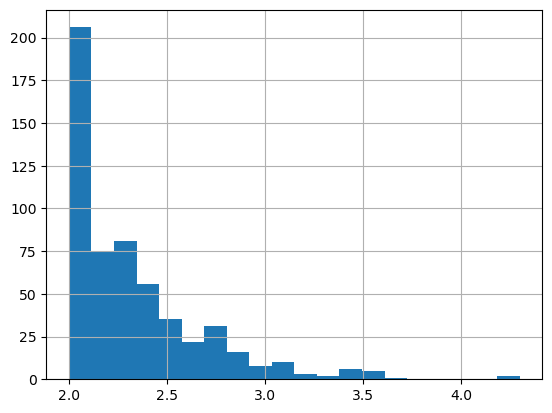

In [56]:
sicilia_magnitude.hist(bins=20)

or embedding it in a *figure* making use of the *matplotlib* library (it gives you more freedom in putting axis labels having some size, etc...)  

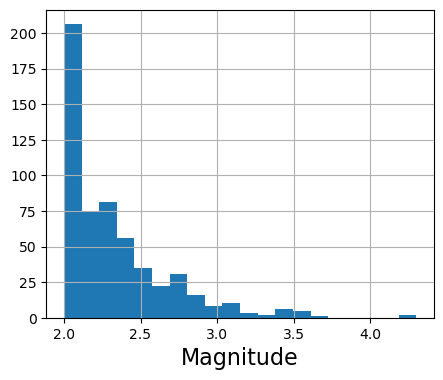

In [57]:
plt.figure(figsize=(5,4))
sicilia_magnitude.hist(bins=20)
plt.xlabel('Magnitude', fontsize=16)
plt.show()

We can transform the DataSerie in a numpy array:

In [58]:
sicilia_m_list=np.array(sicilia_magnitude)

In [59]:
sicilia_m_list

array([2.1, 2.1, 2. , 2.1, 2.3, 2.1, 3.5, 2.4, 2.3, 2.3, 2.2, 2.3, 2.3,
       2.1, 2.4, 3.1, 3.3, 2.5, 3.1, 2.6, 3. , 2.4, 2.3, 2.3, 2.3, 2. ,
       2.4, 2.4, 2.4, 2.6, 2.2, 2.4, 2. , 2.6, 2. , 2.5, 2.1, 2.1, 2.4,
       2.4, 2.1, 2.4, 2.4, 2.1, 2.1, 2.2, 2.3, 2.2, 2.5, 2. , 2.1, 2.1,
       2.3, 2.1, 2.4, 2.3, 2.3, 2.2, 2.7, 2.2, 2.1, 2.1, 2.2, 2.2, 2.7,
       2.3, 2. , 2.2, 2.5, 2.2, 2.1, 2.2, 2.1, 2. , 2.2, 2.5, 2.3, 2. ,
       2.6, 2.5, 2.2, 2.3, 2.2, 2.2, 2.3, 2.4, 2.3, 2.4, 2.2, 2.5, 2.2,
       2.3, 2.2, 2.4, 2.4, 2.2, 2.1, 2.9, 2.2, 2.2, 2.1, 2.1, 2.4, 2. ,
       2. , 2.7, 2.3, 2.1, 2.2, 2. , 2.4, 2.2, 2.5, 2.3, 2.5, 2.3, 2.2,
       2.1, 2.7, 2.2, 2. , 2.9, 3.5, 2.4, 2.1, 2.4, 2.1, 3.2, 2.6, 2.2,
       2.5, 2.5, 3.1, 2.9, 2.4, 2.6, 3. , 2.5, 2. , 2. , 2.2, 2.2, 2.6,
       2. , 2.6, 2.1, 2.8, 2.3, 2.1, 2.2, 2.3, 2.3, 2. , 2.4, 2. , 2.1,
       2.5, 2.1, 2. , 2.1, 3.4, 2.4, 2.6, 2.2, 2.4, 3.4, 2.2, 2.2, 2.5,
       2. , 2.3, 2. , 2. , 2. , 2.3, 2.6, 2.1, 3. , 2. , 2.2, 2.

Now, do the same with other files referring to other areas in Italy:

In [60]:
data_north=pd.read_csv('data_files/earthq_north.dat', sep='|')
data_central=pd.read_csv('data_files/earthq_central.dat', sep='|')
data_emilia=pd.read_csv('data_files/earthq_emilia.dat', sep='|')

north_magnitude=data_north['Magnitude']
central_magnitude=data_central['Magnitude']
emilia_magnitude=data_emilia['Magnitude']

north_m_list=np.array(north_magnitude)
central_m_list=np.array(central_magnitude)
emilia_m_list=np.array(emilia_magnitude)

Now, pack everything in the array *sets*:

In [61]:
set_name=['North', 'Emilia', 'Central', 'Sicilia']
x=[north_m_list, emilia_m_list, central_m_list, sicilia_m_list] 

set_list=['set1', 'set2', 'set3', 'set4']

for iset, ix, iname in zip(set_list, x, set_name):
    exec(iset + '= data_class(iname, ix)')
    
l_set=list(eval(iset) for iset in set_list)
sets=np.array(l_set, dtype='object')

Now describe each dataset:

In [62]:
for iset in range(4):
    sets[iset].describe()
    print("")

data-set: North
Size:  131
Average:     2.36
Stand. dev:  0.39

data-set: Emilia
Size:  144
Average:     2.33
Stand. dev:  0.37

data-set: Central
Size:  367
Average:     2.29
Stand. dev:  0.34

data-set: Sicilia
Size:  559
Average:     2.33
Stand. dev:  0.35

